<a href="https://colab.research.google.com/github/rishabhnam002/CodSoft/blob/main/Task1_MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

**IMPORTING THE TRAIN DATA**


In [121]:
df = pd.read_csv("/content/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-121-8a35b2ebe2c8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [122]:
display(df)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [123]:
display(df.head())
print(df.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


**PERFORMING SOME DATA VISUALIZATION METHOD**

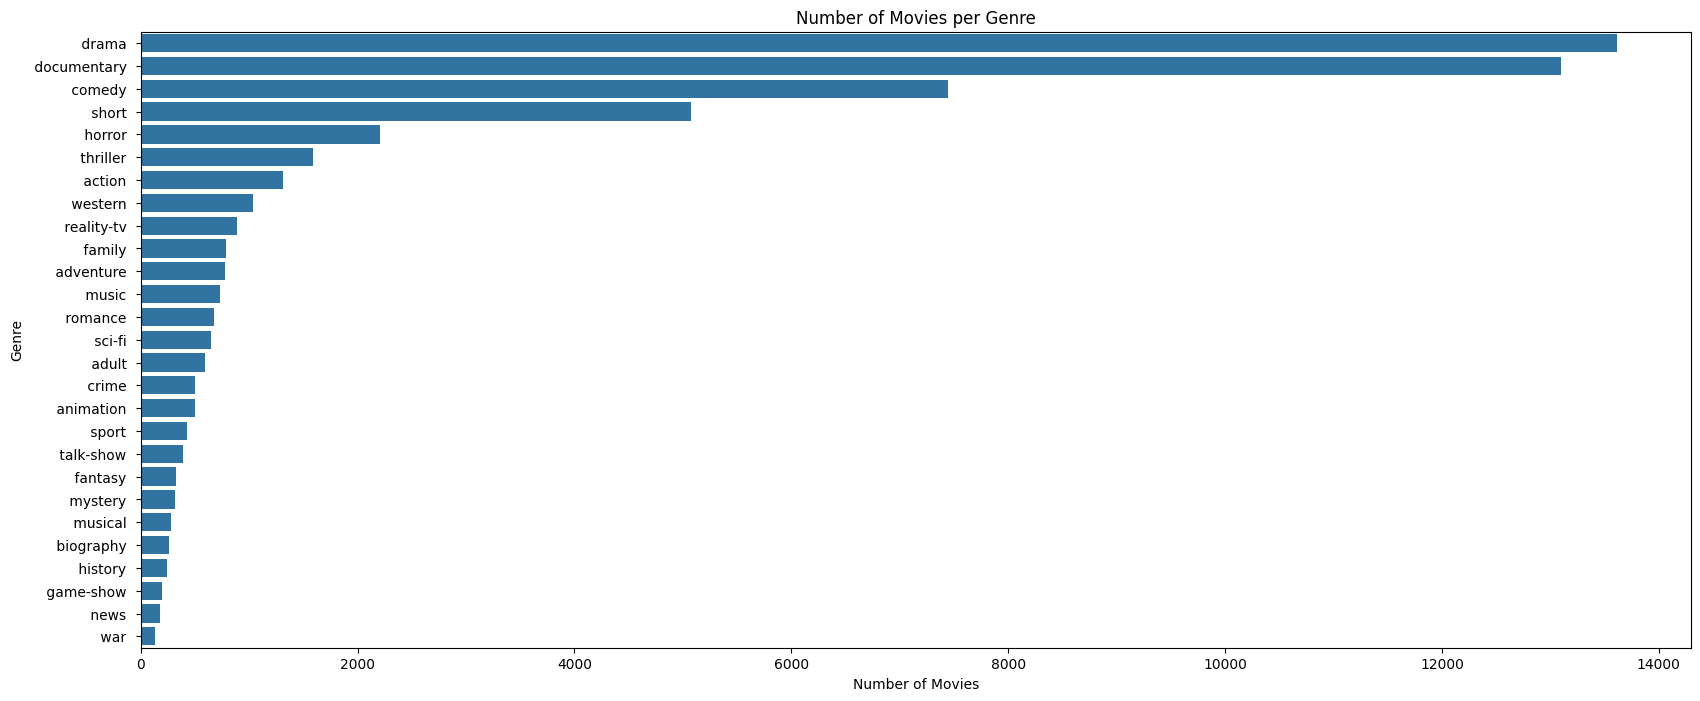

In [124]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['GENRE'], order = df['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**IMPORTING THE TEST DATA**

In [125]:
df1 = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-125-4abefdf7ccdb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [126]:
display(df1)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN


In [127]:
print(display(df1.head()))
print(df1.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


**BAR REPRESENTATION OF GENRE VS DESCRIPTION LENGHT**

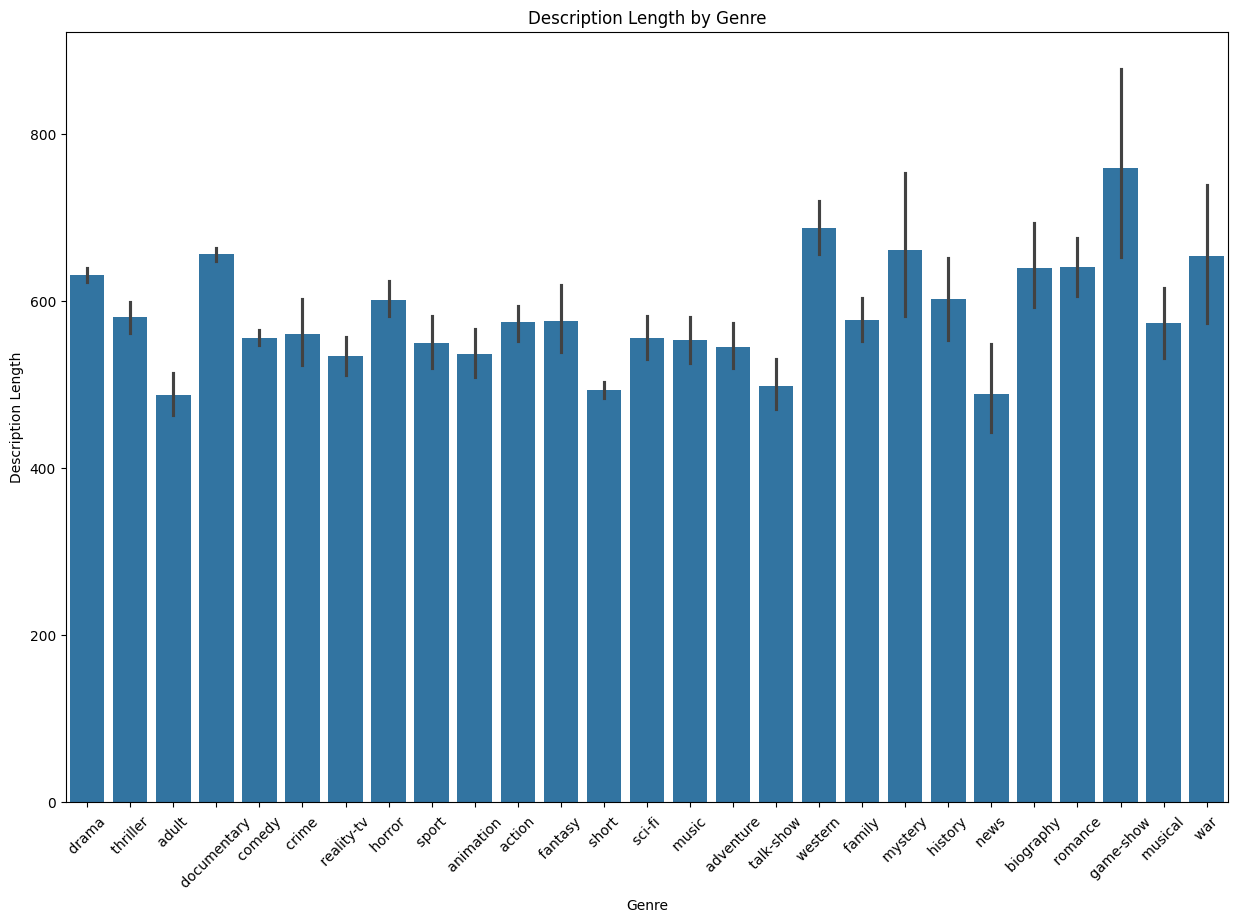

In [128]:
df['DESCRIPTION_length'] = df['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=df)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

**IMPORTING THE TEST SOLUTION DATA**

In [129]:
df2 = pd.read_csv("/content/test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-129-9f5bb0b3ab9f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("/content/test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [130]:
display(df2)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [131]:
print(display(df2.head()))
print(df2.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


**NOW TO GET TO KNOWN ABOUT TOP GENRE WHICH MOSTLY PEOPLE WATCHED**

In [132]:
df['DESCRIPTION'].fillna("", inplace=True)

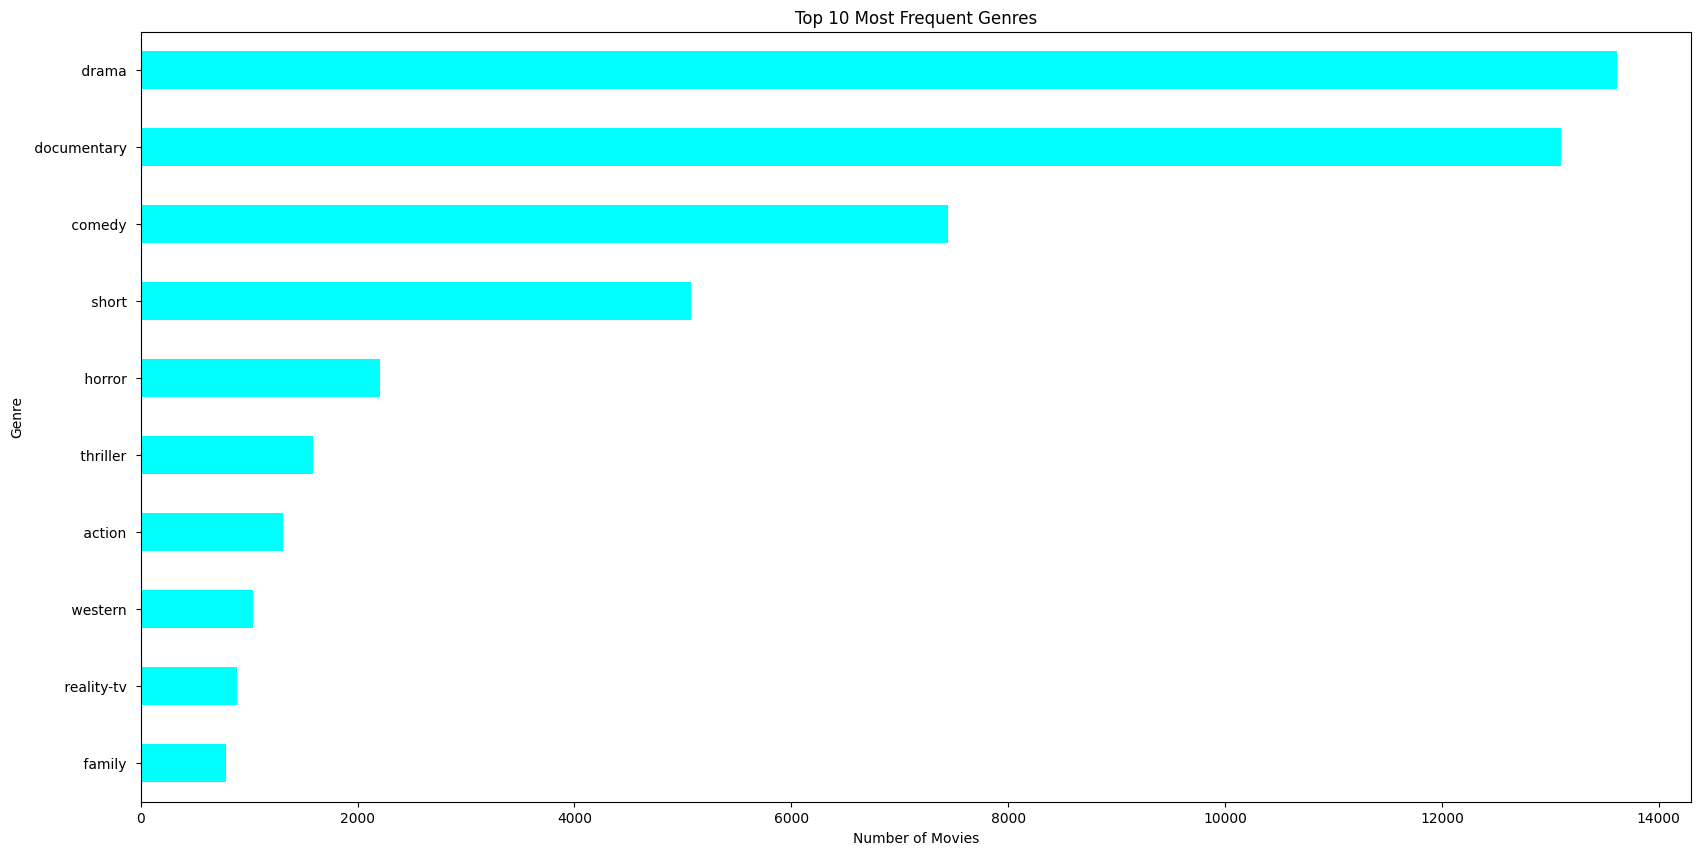

In [133]:
top_genres = df['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

**NOW TRAINING OF THE DATA**

In [134]:
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(df['DESCRIPTION'])

In [135]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df['GENRE'])

In [136]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

**NOW TESTING OF THE DATA**

In [137]:
test_data['DESCRIPTION'].fillna("", inplace=True)

In [138]:
X_test = t_v.transform(test_data['DESCRIPTION'])

In [139]:
y_test = label_encoder.transform(df2['GENRE'])

In [140]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [142]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [143]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [144]:
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

**NOW DESIGNING A FUNCTION SHOW THAT WE CAN PREDICT THE GENRE OF THE MOVIE**

In [145]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

In [146]:
sample_descr_for_movie = "A movie where police cashes the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

 action 


In [147]:

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 drama 
